<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_16_Text_Mining_Elon_Musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Named Entity Recognition

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [32]:
import pandas
tweets=pd.read_csv("Elon_musk.csv",encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [33]:
tweets = [Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets = [Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [34]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [35]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(tweets_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for']


28867

In [36]:
tweets_tokens_text=' '.join(text_tokens)
tweets_tokens_text

"@ kunalb11 I\x92m an alien @ ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? @ joerogan @ Spotify Great interview ! @ gtera27 Doge is underestimated @ teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https : //t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https : //t.co/zGxJFDzzrM @ OwenSparks_ @ flcnhvy @ anonyx10 Haha thanks : ) @ flcnhvy @ anonyx10 Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely @ GiveDirectly Just sent some Just agree to do Clubhouse with @ kanyewest https : //t.co/3rWE9uHSTS @ geoffkeighley @ UnrealEngine It\x92s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler @ JoshManMode He definitely has issues , but the sentencing seems a bit high @ freewalletorg Thanks for fixing @ freewalletorg Please unlock 

In [37]:
no_punc_text = tweets_text.translate(str.maketrans('','', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [38]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [39]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
len(text_tokens)

20423

In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
stop_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.append(stop_list)
no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely']


In [49]:
len(text_tokens)

20423

In [50]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely']


In [51]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit']


In [52]:
##Part Of Speech Tagging
nlp = spacy.load('en')
doc_block = nlp(' '.join(lower_words))
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [53]:
doc_block

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [56]:
for token in doc_block[0:20]:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien PROPN
idaacarmack PROPN
ray NOUN
tracing VERB
cyberpunk PROPN
hdr PROPN
nextlevel PROPN
have AUX
tried VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 PROPN
doge VERB
underestimated ADJ
teslacn NOUN
congratulations NOUN


In [57]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['doge', 'teslacn', 'congratulations', 'execution', 'year', 'frodo', 'thought', 'would', 'fail', 'owensparks', 'thanks', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'sent', 'agree', 'getting']


In [58]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,amp,100
1,ppathole,75
2,spacex,53
3,launch,48
4,would,40
5,wholemarsblog,40
6,make,33
7,people,31
8,need,31
9,production,29


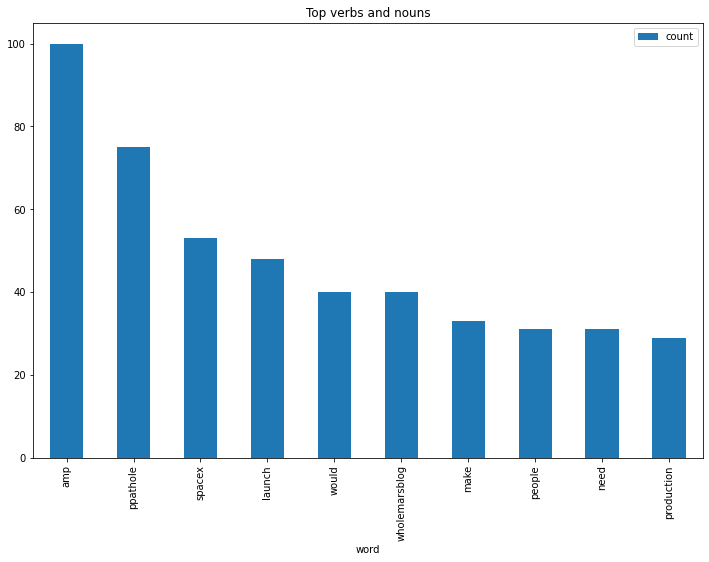

In [59]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [78]:
#Sentiment analysis
afinn=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
tweets=pd.read_csv("Elon_musk.csv",encoding='Latin-1')
tweets = [Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets = [Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False

In [73]:
from nltk import tokenize
import nltk
nltk.download('punkt')
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [74]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [85]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [80]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [81]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [86]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [87]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [89]:
sent_df.sort_values(by='sentiment_value').head(10)

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
611,"Then static fire, checkouts, static fire, fly ...",-4,12
503,@raytech247 @WholeMarsBlog Even GM &amp; Chrys...,-3,10
887,Will those who write the algorithms ever reali...,-3,11
23,https://t.co/UEEocOfcTb The people have spoken...,-3,37
886,This is primarily an electrical/electronic (ch...,-3,69
729,Those worry me.,-3,3


In [90]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.497835
std        2.763913
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [91]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [92]:
sent_df[sent_df['sentiment_value']>0].head()

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38


In [94]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


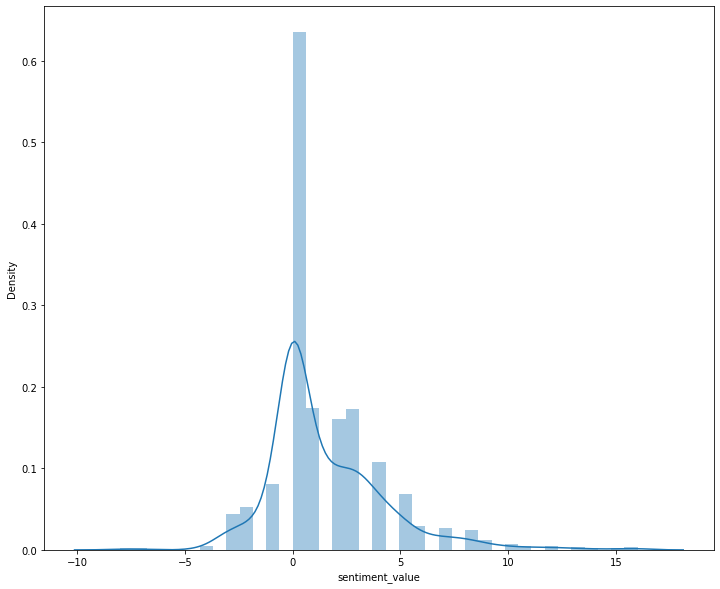

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.distplot(sent_df['sentiment_value'])

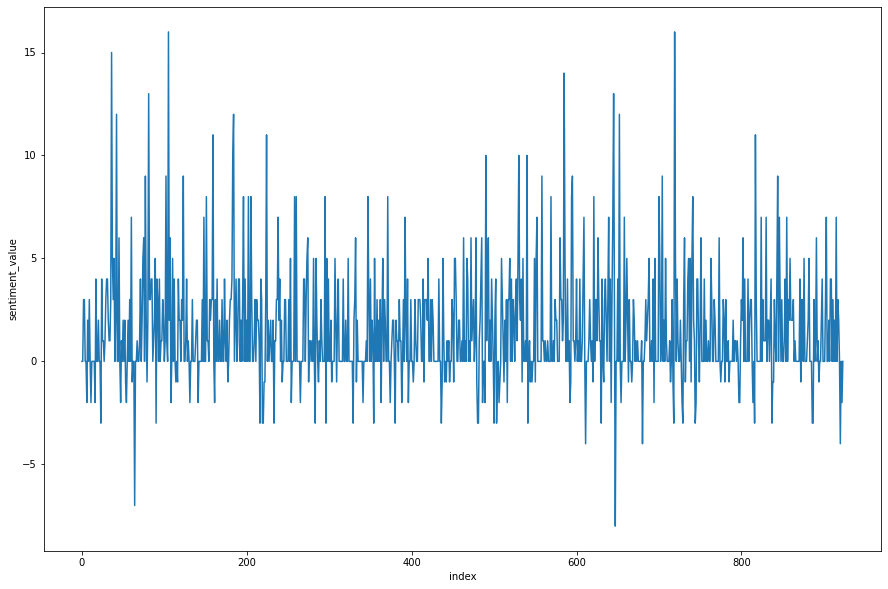

In [99]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

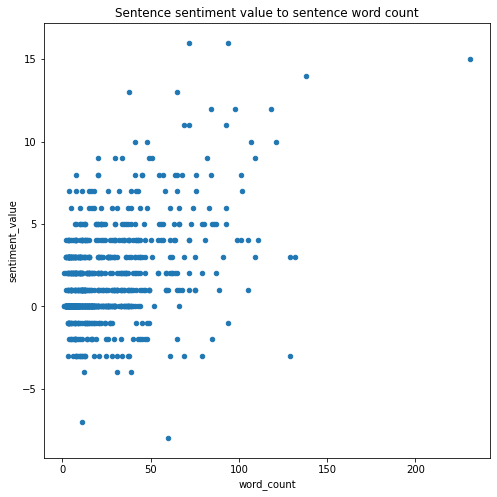

In [100]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')